# AI2100  -  DEEP LEARNING
# Programming Assignment 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.decomposition import PCA
import os
from matplotlib.image import imread

## Q1:

### Resize Operation

In [5]:
def resize_image(img, new_size=(64, 64)):
    h, w, c = img.shape
    new_h, new_w = new_size
    resized = np.zeros((new_h, new_w, c), dtype=img.dtype)

    row_scale = h / new_h
    col_scale = w / new_w

    for i in range(new_h):
        for j in range(new_w):
            resized[i, j] = img[int(i * row_scale), int(j * col_scale)]
    return resized

### Random Rotation Operation

In [7]:
def random_rotate_90(img):
    if np.random.rand() > 0.5:
        return np.rot90(img)   
    return img

### Dataloader

In [9]:
def prepare_for_display(img):
    if img.dtype != np.uint8:
        img = img.astype(np.float32)
        if img.max() <= 1.0:   
            img = (img * 255).astype(np.uint8)
        else:                 
            img = img.astype(np.uint8)
    return img

def load_labels(label_file):
    labels = {}
    with open(label_file, "r") as f:
        reader = csv.reader(f)
        next(reader)  
        for row in reader:
            img_id, label = row
            labels[img_id] = label  
    return labels

In [10]:
class DataLoader:
    def __init__(self, image_folder, labels, batch_size=8, resize_shape=(64, 64)):
        self.image_folder = image_folder
        self.labels = labels
        self.batch_size = batch_size
        self.resize_shape = resize_shape
        self.image_files = sorted(os.listdir(image_folder), key=lambda x: int(x.split(".")[0]))
        self.num_batches = int(np.ceil(len(self.image_files) / batch_size))

    def __iter__(self):
        for i in range(self.num_batches):
            batch_files = self.image_files[i*self.batch_size:(i+1)*self.batch_size]
            images, targets = [], []
            for fname in batch_files:
                img = imread(os.path.join(self.image_folder, fname))

                # Apply transformations
                img = resize_image(img, self.resize_shape)
                img = random_rotate_90(img)

                images.append(img)
                targets.append(self.labels[fname.split(".")[0]])  # class name
            yield np.array(images), targets


### Visualizing first 3 batches

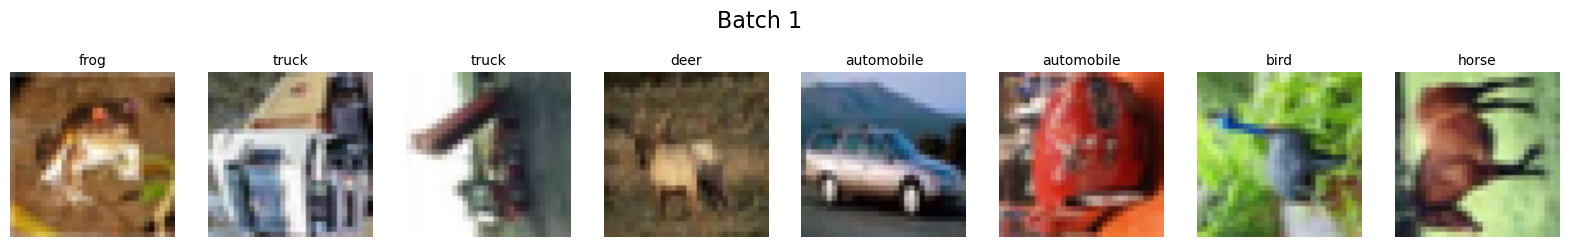

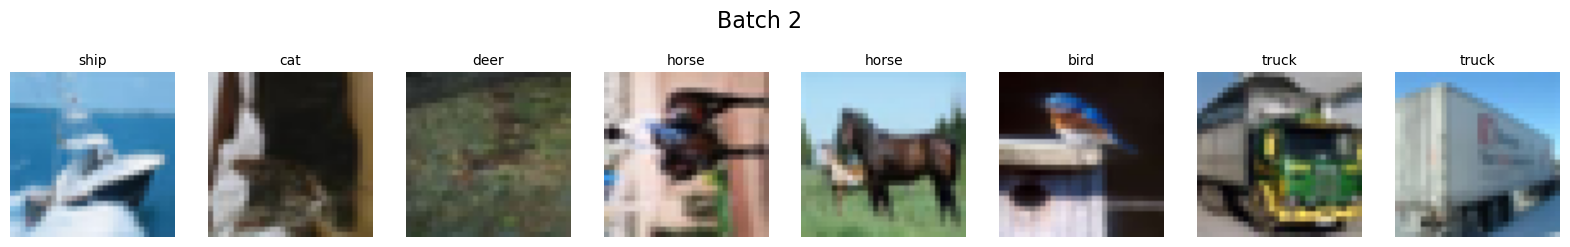

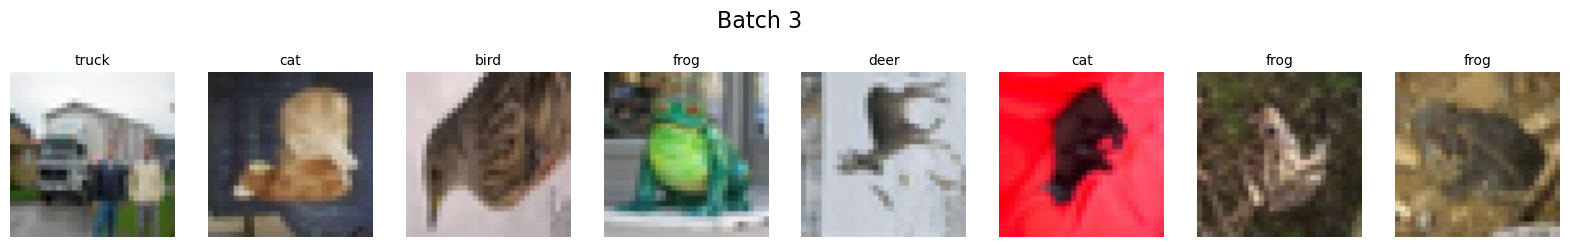

In [109]:
image_folder = "train"
label_file = "trainLabels.csv"

labels = load_labels(label_file)

loader = DataLoader(image_folder, labels, batch_size=8, resize_shape=(64, 64))

for batch_idx, (x_batch, y_batch) in enumerate(loader):
    if batch_idx >= 3:
        break
    fig, axs = plt.subplots(1, 8, figsize=(20, 3))
    fig.suptitle(f"Batch {batch_idx+1}", fontsize=16)
    for i in range(len(x_batch)):
        img_to_show = x_batch[i]
        if img_to_show.max() <= 1.0:   
            img_to_show = (img_to_show * 255).astype(np.uint8)
        axs[i].imshow(img_to_show)
        axs[i].axis("off")
        axs[i].set_title(y_batch[i], fontsize=10) 
    plt.show()

# Q2:-
### Ploting the histogram for each class of data.

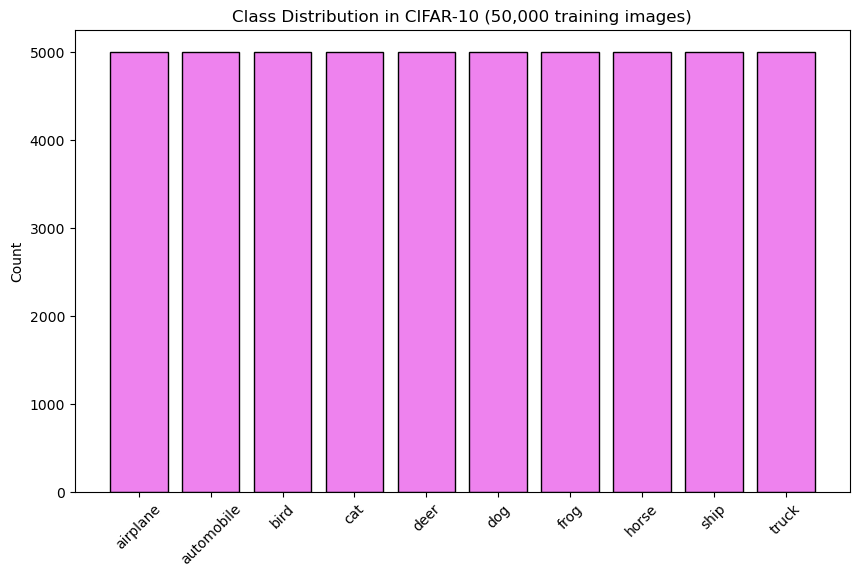

In [97]:
labels = load_labels(label_file)

class_names = sorted(list(set(labels.values())))
class_to_idx = {name: i for i, name in enumerate(class_names)}

class_counts = np.zeros(len(class_names), dtype=int)
for lbl in labels.values():
    class_counts[class_to_idx[lbl]] += 1

plt.figure(figsize=(10,6))
plt.bar(class_names, class_counts, color="violet", edgecolor="black")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.title("Class Distribution in CIFAR-10 (50,000 training images)")
plt.show()

# Q3:-
## visualizing the L1 and L2 norms:

Image 0 (frog): L1 = 4984.94, L2 = 50.33
Image 1 (truck): L1 = 6281.21, L2 = 62.47
Image 2 (truck): L1 = 6444.72, L2 = 68.32
Image 3 (deer): L1 = 3865.87, L2 = 38.31
Image 4 (automobile): L1 = 4986.27, L2 = 52.12
Image 5 (automobile): L1 = 4352.99, L2 = 47.37
Image 6 (bird): L1 = 5763.72, L2 = 56.92
Image 7 (horse): L1 = 5864.44, L2 = 58.86


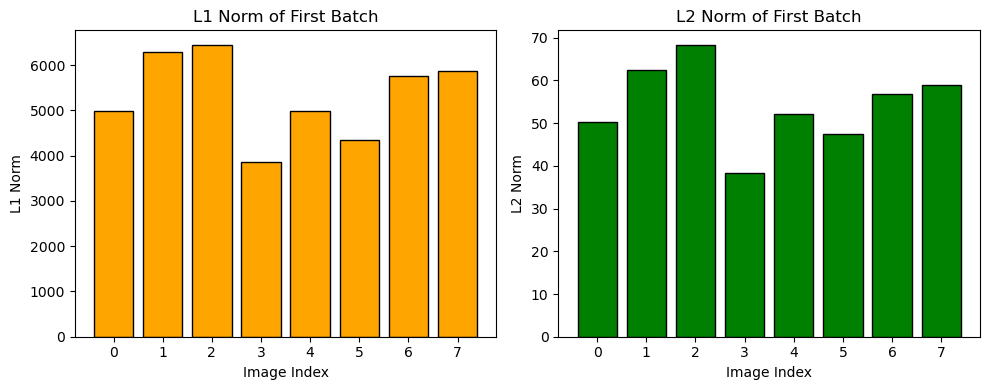

In [16]:
batch_images, batch_labels = next(iter(loader))   
batch_images = np.array(batch_images)  

l1_norms = []
l2_norms = []

for idx, img in enumerate(batch_images):
    img_flat = img.flatten()   
    l1 = np.sum(np.abs(img_flat))
    l2 = np.sqrt(np.sum(img_flat**2))
    l1_norms.append(l1)
    l2_norms.append(l2)

    label = batch_labels[idx]
    if isinstance(label, (int, np.integer)):  
        label_name = class_names[label]
    else:  
        label_name = label  
    
    print(f"Image {idx} ({label_name}): L1 = {l1:.2f}, L2 = {l2:.2f}")

x = np.arange(len(batch_images))  

plt.figure(figsize=(10,4))

# L1 Norm Plot
plt.subplot(1,2,1)
plt.bar(x, l1_norms, color="orange", edgecolor="black")
plt.title("L1 Norm of First Batch")
plt.xlabel("Image Index")
plt.ylabel("L1 Norm")

# L2 Norm Plot
plt.subplot(1,2,2)
plt.bar(x, l2_norms, color="green", edgecolor="black")
plt.title("L2 Norm of First Batch")
plt.xlabel("Image Index")
plt.ylabel("L2 Norm")

plt.tight_layout()
plt.show()

# 4Q:-

## Loading 100 images from my DataLoader 'loader' 

In [19]:
images, labels = next(iter(loader))
all_images = [images[i] for i in range(len(images))]
all_labels = [labels[i] for i in range(len(labels))]

loader_iter = iter(loader)
while len(all_images) < 100:
    imgs, lbls = next(loader_iter)
    all_images.extend([imgs[i] for i in range(len(imgs))])
    all_labels.extend([lbls[i] for i in range(len(lbls))])

all_images = np.array(all_images[:100])
all_labels = np.array(all_labels[:100])

# Map string labels to integers if needed
unique_classes = np.unique(all_labels)
class_to_idx = {cls: i for i, cls in enumerate(unique_classes)}
y = np.array([class_to_idx[label] for label in all_labels])

# One-hot encode labels
Y = np.zeros((100, len(unique_classes)))
Y[np.arange(100), y] = 1

## a) center crop transformation

In [21]:
def center_crop(img, size=64):
    h, w = img.shape[:2]
    start_h = (h - size) // 2
    start_w = (w - size) // 2
    return img[start_h:start_h+size, start_w:start_w+size]

## b) Flattening the images

In [23]:
X = np.array([center_crop(img, 64).flatten() for img in all_images])
X = X / 255.0  # optional normalization
cropped_images = np.array([center_crop(img, 64) for img in all_images])
print("Shape of cropped images:", cropped_images.shape)
print(X)
input_dim = X.shape[1]

Shape of cropped images: (100, 64, 64, 3)
[[0.00227605 0.00190696 0.00158401 ... 0.00272203 0.00221453 0.00178393]
 [0.00236832 0.00272203 0.00287582 ... 0.00219915 0.00204537 0.00221453]
 [0.00389081 0.00389081 0.00389081 ... 0.00163014 0.00173779 0.00161476]
 ...
 [0.00195309 0.00199923 0.00118416 ... 0.00155325 0.00153787 0.00163014]
 [0.0031065  0.00290657 0.00255286 ... 0.00189158 0.00152249 0.00119954]
 [0.00055363 0.00124567 0.00213764 ... 0.00041522 0.00069204 0.00139946]]


## c) MLP initialization

ReLU | Epoch 1: LR=0.01, Loss=1.0000
ReLU | Epoch 2: LR=0.01, Loss=0.9954
ReLU | Epoch 3: LR=0.01, Loss=0.9910
ReLU | Epoch 4: LR=0.01, Loss=0.9868
ReLU | Epoch 5: LR=0.01, Loss=0.9827
ReLU | Epoch 6: LR=0.01, Loss=0.9789
ReLU | Epoch 7: LR=0.01, Loss=0.9751
ReLU | Epoch 8: LR=0.01, Loss=0.9715
ReLU | Epoch 9: LR=0.01, Loss=0.9681
ReLU | Epoch 10: LR=0.01, Loss=0.9648
Sigmoid | Epoch 1: LR=0.01, Loss=1.0474
Sigmoid | Epoch 2: LR=0.01, Loss=0.9557
Sigmoid | Epoch 3: LR=0.01, Loss=0.9157
Sigmoid | Epoch 4: LR=0.01, Loss=0.8982
Sigmoid | Epoch 5: LR=0.01, Loss=0.8905
Sigmoid | Epoch 6: LR=0.01, Loss=0.8872
Sigmoid | Epoch 7: LR=0.01, Loss=0.8857
Sigmoid | Epoch 8: LR=0.01, Loss=0.8851
Sigmoid | Epoch 9: LR=0.01, Loss=0.8848
Sigmoid | Epoch 10: LR=0.01, Loss=0.8847
Tanh | Epoch 1: LR=0.01, Loss=1.0000
Tanh | Epoch 2: LR=0.01, Loss=0.9954
Tanh | Epoch 3: LR=0.01, Loss=0.9909
Tanh | Epoch 4: LR=0.01, Loss=0.9867
Tanh | Epoch 5: LR=0.01, Loss=0.9826
Tanh | Epoch 6: LR=0.01, Loss=0.9787
Tanh |

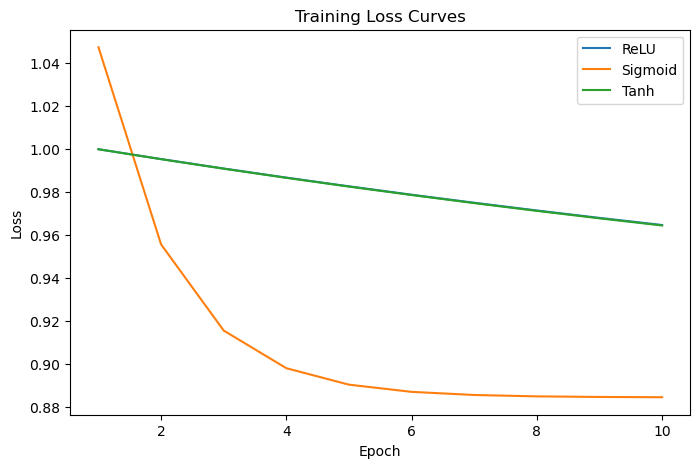

In [107]:
h1, h2, out_dim = 128, 64, 10
rng = np.random.default_rng(42)

def init_weights():
    W1 = rng.normal(0, 0.01, (input_dim, h1)); b1 = np.zeros((1, h1))
    W2 = rng.normal(0, 0.01, (h1, h2)); b2 = np.zeros((1, h2))
    W3 = rng.normal(0, 0.01, (h2, out_dim)); b3 = np.zeros((1, out_dim))
    return W1, b1, W2, b2, W3, b3

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): 
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x): return np.tanh(x)
def tanh_deriv(x): return 1 - np.tanh(x)**2

activations = {
    "ReLU": (relu, relu_deriv),
    "Sigmoid": (sigmoid, sigmoid_deriv),
    "Tanh": (tanh, tanh_deriv),
}

def train(act_name, epochs=10, lr=0.01):
    W1, b1, W2, b2, W3, b3 = init_weights()
    act, act_deriv = activations[act_name]

    losses = []
    for epoch in range(1, epochs+1):
        # Forward pass
        z1 = X @ W1 + b1
        a1 = act(z1)
        z2 = a1 @ W2 + b2
        a2 = act(z2)
        z3 = a2 @ W3 + b3
        y_pred = z3  

        # L2 loss
        loss = np.mean(np.sum((y_pred - Y)**2, axis=1))
        losses.append(loss)

        # Backprop
        dL_dy = 2 * (y_pred - Y) / X.shape[0]
        dW3 = a2.T @ dL_dy; db3 = np.sum(dL_dy, axis=0, keepdims=True)

        da2 = dL_dy @ W3.T
        dz2 = da2 * act_deriv(z2)
        dW2 = a1.T @ dz2; db2 = np.sum(dz2, axis=0, keepdims=True)

        da1 = dz2 @ W2.T
        dz1 = da1 * act_deriv(z1)
        dW1 = X.T @ dz1; db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights
        W1 -= lr * dW1; b1 -= lr * db1
        W2 -= lr * dW2; b2 -= lr * db2
        W3 -= lr * dW3; b3 -= lr * db3

        print(f"{act_name} | Epoch {epoch}: LR={lr}, Loss={loss:.4f}")

    plt.plot(range(1, epochs+1), losses, label=act_name)

plt.figure(figsize=(8,5))
for name in activations.keys():
    train(name)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curves")
plt.legend()
plt.show()


## Comments:
#### The sigmoid shows strong initial updates but quickly plateaus because gradients vanish once activations saturate.
#### Both ReLU and tanh maintain steady, non-vanishing gradients, leading to smoother, more consistent loss reduction.
#### Overall, ReLU/tanh are better suited for deeper networks, while sigmoid struggles due to vanishing gradients.

## Q5) 
### Implementation of T-SNE.

In [63]:
X_norm = (X - np.mean(X, axis=0)) / (np.std(X, axis=0) + 1e-8)
n, d = X_norm.shape


def minmax_scale(Y):
    return (Y - np.min(Y, axis=0)) / (np.max(Y, axis=0) - np.min(Y, axis=0))

def pairwise_distances(X):
    sum_X = np.sum(np.square(X), axis=1)
    D = np.add.outer(sum_X, sum_X) - 2 * X @ X.T
    D = np.maximum(D, 0)
    return D

def compute_perplexity_probabilities(D, perplexity=30.0, tol=1e-5):
    n = D.shape[0]
    P = np.zeros((n, n))
    logU = np.log(perplexity)

    for i in range(n):
        beta = 1.0
        betamin, betamax = -np.inf, np.inf
        Di = np.delete(D[i], i)

        for _ in range(50):
            Pi = np.exp(-Di * beta)
            sumPi = np.sum(Pi)
            if sumPi == 0:
                sumPi = 1e-12  # avoid division by zero
            Pi /= sumPi

            H = -np.sum(Pi * np.log(Pi + 1e-12))
            Hdiff = H - logU

            if np.abs(Hdiff) < tol:
                break

            if Hdiff > 0:
                betamin = beta
                beta = beta*2 if betamax == np.inf else (beta + betamax)/2
            else:
                betamax = beta
                beta = beta/2 if betamin == -np.inf else (beta + betamin)/2

        P[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = Pi

    P = (P + P.T) / (2*n)
    P = np.maximum(P, 1e-12)
    return P

def tSNE_perplexity(X, no_dims=2, perplexity=30.0, lr=200.0, n_iter=500):
    n, d = X.shape
    Y = np.random.randn(n, no_dims) * 1e-4
    D = pairwise_distances(X)
    P = compute_perplexity_probabilities(D, perplexity=perplexity)
    P *= 4  # early exaggeration

    Y_momentum = np.zeros_like(Y)
    momentum = 0.5

    for iter in range(n_iter):
        sum_Y = np.sum(np.square(Y), axis=1)
        num = 1 / (1 + np.add.outer(sum_Y, sum_Y) - 2 * Y @ Y.T)
        np.fill_diagonal(num, 0)
        Q = num / np.sum(num)
        Q = np.maximum(Q, 1e-12)

        PQ = P - Q
        dY = np.zeros_like(Y)
        for i in range(n):
            dY[i] = 4 * np.sum((PQ[:, i] * num[:, i])[:, None] * (Y[i] - Y), axis=0)

        Y_momentum = momentum * Y_momentum + lr * dY
        Y += Y_momentum

        if iter == 100:
            momentum = 0.8
            P /= 4

        if iter % 100 == 0 or iter == n_iter-1:
            kl = np.sum(P * np.log((P + 1e-12) / (Q + 1e-12)))
            print(f"t-SNE Iter {iter}: KL divergence = {kl:.4f}")

    return Y

Y_tsne = tSNE_perplexity(X_norm, no_dims=2, perplexity=30.0, lr=200.0, n_iter=500)
Y_tsne_scaled = minmax_scale(Y_tsne)  # scale t-SNE outputs for plotting

t-SNE Iter 0: KL divergence = 9.4113
t-SNE Iter 100: KL divergence = 2.5445
t-SNE Iter 200: KL divergence = 3.2816
t-SNE Iter 300: KL divergence = 2.2810
t-SNE Iter 400: KL divergence = 2.2891
t-SNE Iter 499: KL divergence = 2.9689


## PCA for comparison

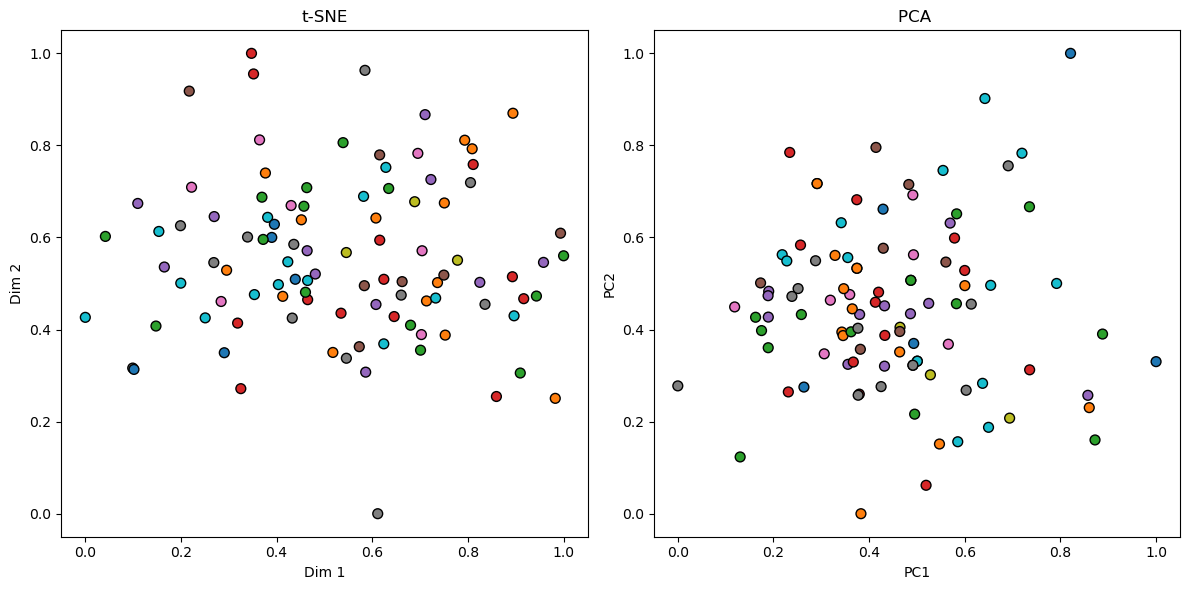

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
X_pca_scaled = minmax_scale(X_pca)  

plt.figure(figsize=(12,6))
colors = plt.cm.tab10(y / np.max(y))

plt.subplot(1,2,1)
plt.scatter(Y_tsne_scaled[:,0], Y_tsne_scaled[:,1], c=colors, s=50, edgecolors='k')
plt.title("t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.subplot(1,2,2)
plt.scatter(X_pca_scaled[:,0], X_pca_scaled[:,1], c=colors, s=50, edgecolors='k')
plt.title("PCA ")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.tight_layout()
plt.show()